**PROBLEM STATEMENT**

In this project, a regression model is developed to predict the probability of being accepted for Graduate school.

Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions

Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

The dataset contains the following parameters:

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

In [ ]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load dataset 
admission_df =pd.read_csv('Admission.csv')

In [ ]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admission_df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [ ]:
admission_df.value_counts().sum()

400

In [ ]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
admission_df = admission_df.drop(['Serial No.'], axis=1)

In [ ]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admission Chance'],
      dtype='object')

In [ ]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
column_headers = admission_df.columns.values

In [ ]:
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

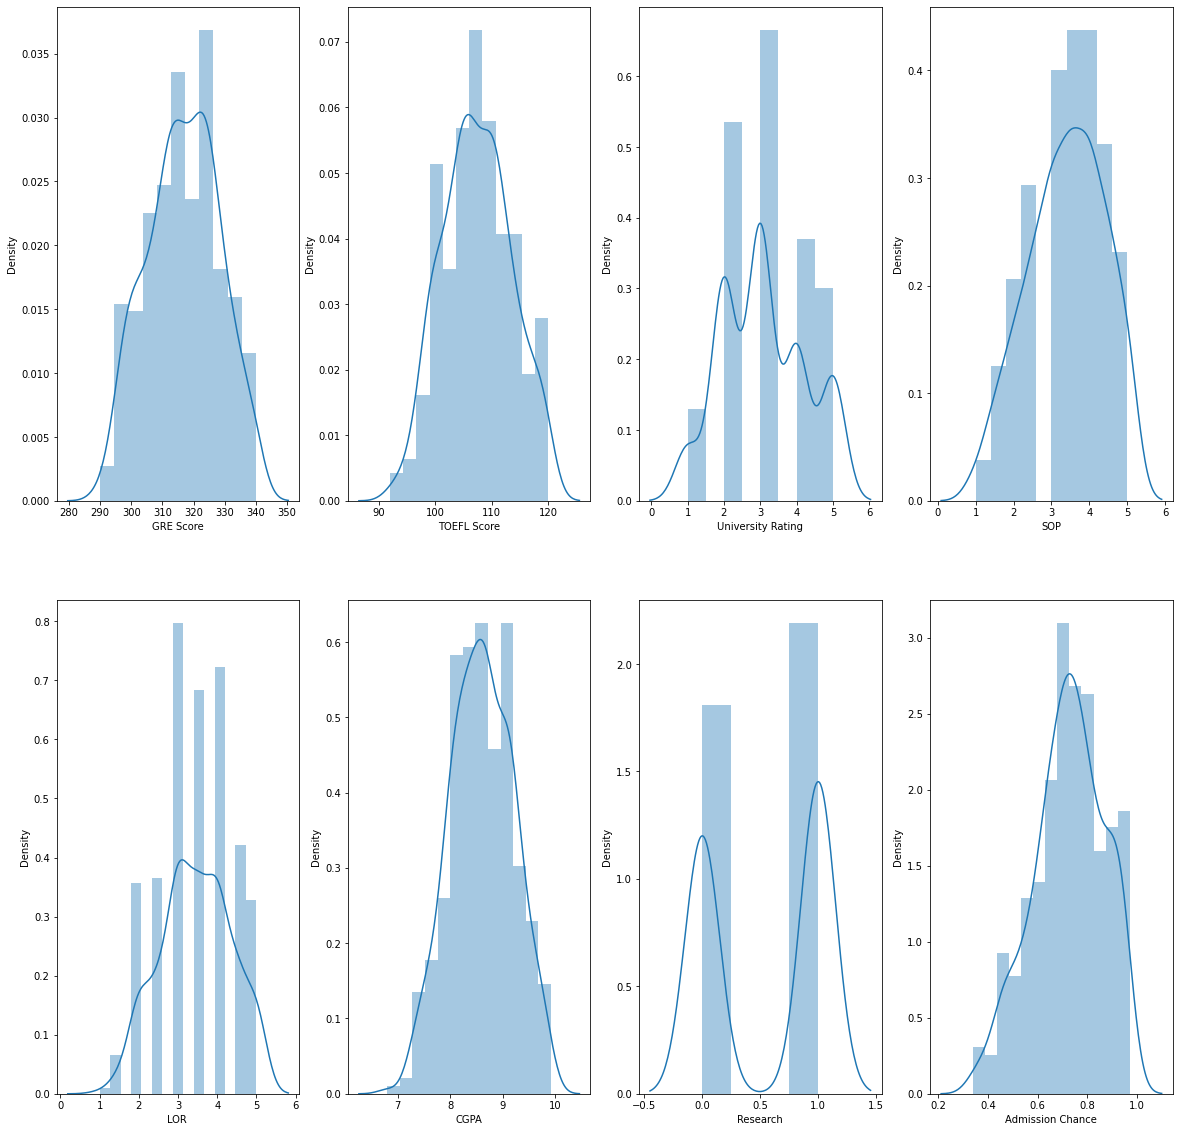

In [ ]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.distplot(admission_df[column_header])
    i = i + 1
plt.show()    

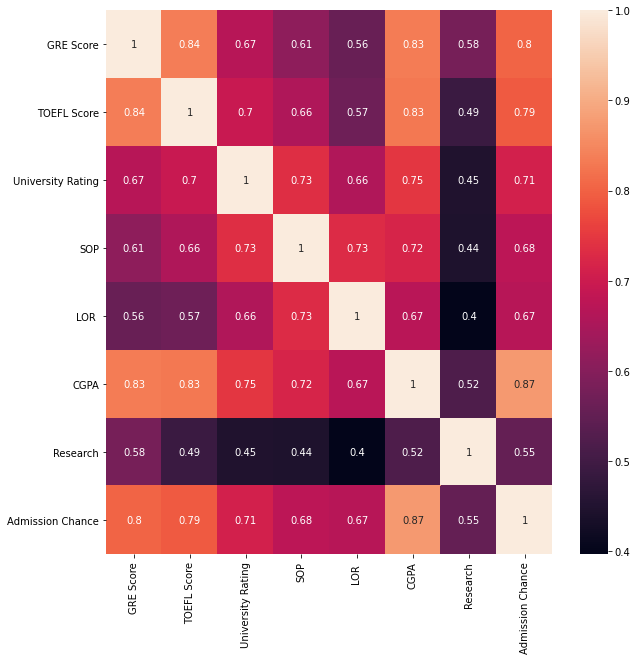

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(admission_df.corr(), annot = True)

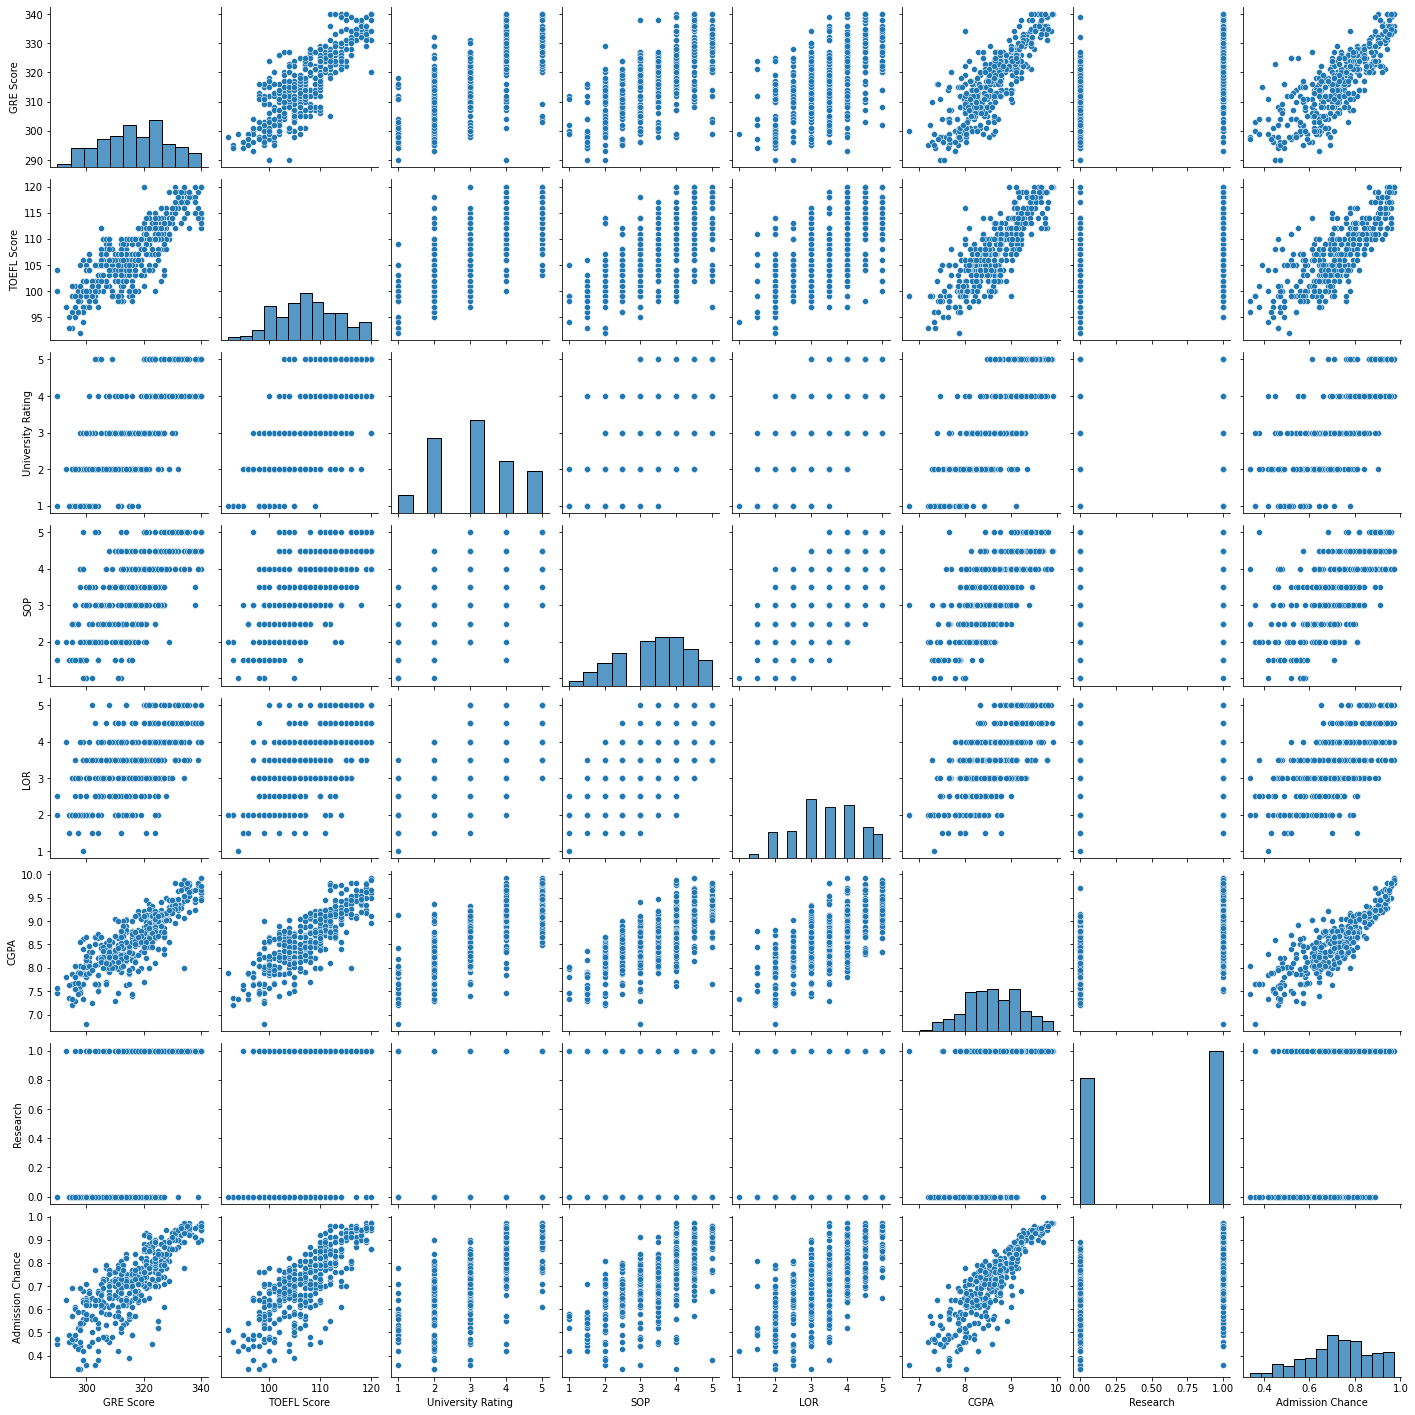

In [ ]:
sns.pairplot(admission_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

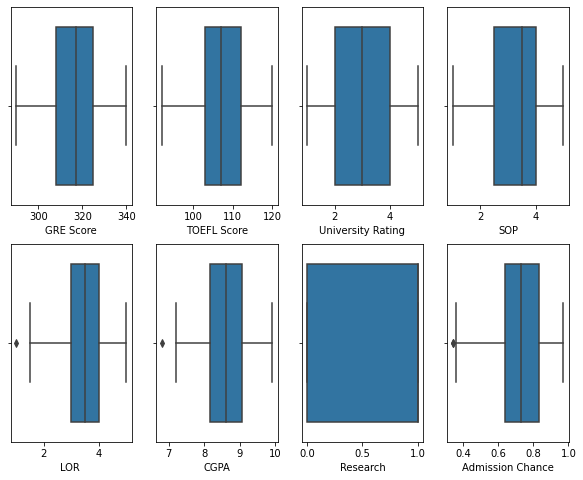

In [ ]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (10, 8))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.boxplot(admission_df[column_header])
    i = i + 1
plt.show();    

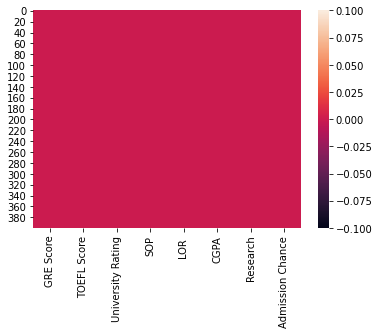

In [ ]:
sns.heatmap(admission_df.isnull())

In [ ]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admission Chance'],
      dtype='object')

In [ ]:
X = admission_df.drop(['Admission Chance'], axis =1)
# X =admission_df[['GRE Score', 'TOEFL Score', 'CGPA']]

In [ ]:
y= admission_df['Admission Chance']

In [ ]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [ ]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Admission Chance, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train.shape

(320, 7)

In [ ]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
34,331,112,5,4.0,5.0,9.80,1
311,328,108,4,4.5,4.0,9.18,1
89,316,109,4,4.5,3.5,8.76,1
327,295,101,2,2.5,2.0,7.86,0
290,307,105,2,2.5,3.0,7.65,0


In [ ]:
y_test.head()

34     0.94
311    0.84
89     0.74
327    0.69
290    0.58
Name: Admission Chance, dtype: float64

In [ ]:
y_train.shape

(320,)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Linear Model coeff (m)', regressor.coef_)
print('Linear Model coeff (b)', regressor.intercept_)

Linear Model coeff (m) [ 0.00161659  0.00270727  0.00463974 -0.00142003  0.02124779  0.11686245
  0.03097216]
Linear Model coeff (b) -1.1813846835156554


In [ ]:
y_predict = regressor.predict(X_test)

Text(0.5, 1.0, 'Mutliple Linear reg')

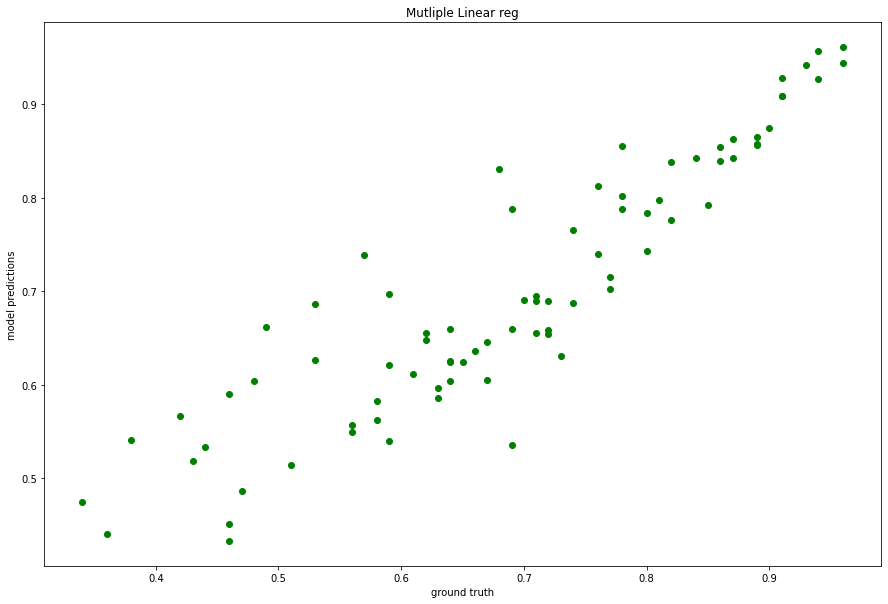

In [ ]:
plt.figure(figsize=[15,10])
plt.scatter(y_test, y_predict, color = 'g')
plt.ylabel('model predictions')
plt.xlabel('ground truth')
plt.title('Mutliple Linear reg')

In [ ]:
k = X_test.shape[1]
n= len(X_test)  

In [ ]:
print(k, n)

7 80


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

MSE = mean_squared_error(y_test, y_predict)
RMSE =float(format(np.sqrt(MSE), '.3f'))
MAE = mean_absolute_error(y_test, y_predict)
r2 =r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1) #n= rows k = columns from X_test
MAPE = np.mean(np.abs((y_test-y_predict)/y_test))*100

In [ ]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =',MAE, '\nr2 =', r2, '\nAdjusted R2=', adj_r2, '\nMAPE=', MAPE,'%' )

RMSE = 0.067 
MSE = 0.004468148570333073 
MAE = 0.04786133076228916 
r2 = 0.8197164069426617 
Adjusted R2= 0.8021888353954204 
MAPE= 8.381130386477574 %


In [ ]:
 X =admission_df[['GRE Score', 'TOEFL Score']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 



RMSE = 0.084 
MSE = 0.007052723766536935 
MAE = 0.06538723092646286 
R2 = 0.6641949884846968 
Adjusted R2 = 0.6554727803933902 
Mean Absolute Percentage Error = 10.255523869372565 %


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid(np.linspace(admission_df['GRE Score'].min(), admission_df['GRE Score'].max(), 100)  , np.linspace(admission_df['TOEFL Score'].min(), admission_df['TOEFL Score'].max(), 100)  )
onlyX = pd.DataFrame({'GRE Score': x_surf.ravel(), 'TOEFL Score':y_surf.ravel()})
fittedY = regressor.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

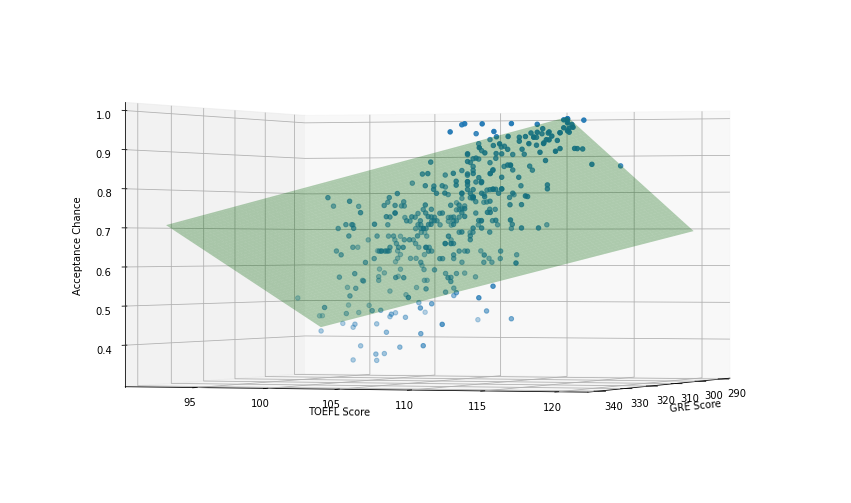

In [ ]:
fig = plt.figure(figsize=[15,9])
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(admission_df['GRE Score'], admission_df['TOEFL Score'], admission_df['Admission Chance'])
ax.plot_surface(x_surf, y_surf, fittedY, color = 'g', alpha = 0.3)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Acceptance Chance')
ax.view_init(0,20)